# **W2-Lab1.Questions-DataUnderstanding.ipynb**

# Question 1: Data Understanding

### Task:
Print the data types of each column and use descriptive statistics to understand the data.

In [58]:
import pandas as pd

file_path = 'house_prices.csv'
df = pd.read_csv(file_path)

print("Data Types of Each Column:")
print(df.dtypes)
print("\n")

print("Descriptive Statistics:")
print(df.describe(include='all'))

Data Types of Each Column:
ID              int64
Size(sqft)    float64
Bedrooms      float64
Badhrooms     float64
Location       object
House_Type     object
Year_Built    float64
Date_Sold      object
Price         float64
dtype: object


Descriptive Statistics:
                ID     Size(sqft)    Bedrooms   Badhrooms Location House_Type  \
count   110.000000      98.000000  102.000000   90.000000      100         95   
unique         NaN            NaN         NaN         NaN        3         15   
top            NaN            NaN         NaN         NaN    Urban  Apartment   
freq           NaN            NaN         NaN         NaN       37         25   
mean     55.500000   17912.581633   14.813725   12.677778      NaN        NaN   
std      31.898276   72463.968277   65.929114   50.381874      NaN        NaN   
min       1.000000   -4529.000000   -3.000000   -3.000000      NaN        NaN   
25%      28.250000    1415.500000    2.000000    1.000000      NaN        NaN   
50%   

The data types for ID (int64), Size(sqft) (float64), Bedrooms (float64), Bathrooms (float64), Location (object), House_Type (object), Year_Built (float64), Date_Sold (object), and Price (float64) are mostly correct except
- changing the data type of Date_Sold to datetime
- Price Column shows -ve min value, probably not right
- counts of some columns do not match the total number of rows
- inconsistent formatting in location and house_type
- Spelling of bathrooms is incorrect


In [61]:
# Convert 'Date_Sold' to datetime
df['Date_Sold'] = pd.to_datetime(df['Date_Sold'])
print(df['Date_Sold'].head())

0   2020-07-21
1   2022-02-02
2   2023-06-06
3   2023-06-04
4          NaT
Name: Date_Sold, dtype: datetime64[ns]


In [60]:
# Rename Badhrooms to Bathrooms
df.rename(columns={'Badhrooms': 'Bathrooms'}, inplace=True)
print(df.columns)

Index(['ID', 'Size(sqft)', 'Bedrooms', 'Bathrooms', 'Location', 'House_Type',
       'Year_Built', 'Date_Sold', 'Price'],
      dtype='object')


# Question 2: Identifying and Handling Missing Values

### Task:
Identify missing values in the dataset and propose methods to handle them.

In [62]:
missing_values = df.isnull().sum()

print(missing_values[missing_values > 0])

Size(sqft)    12
Bedrooms       8
Bathrooms     20
Location      10
House_Type    15
Year_Built    11
Date_Sold     10
Price          5
dtype: int64


  * Patterns
- Bathrooms have the highest number of missing values, meaning there must be a significant issue
- Price has the fewest but is probably the most important

    **Handling the missing values**
 - Use mean or median for numerical values like bathrooms and bedrooms
 - use most frequent value or apply forward for location, House_Type, Date_Sold as these are categorical    
 - For price we either need to remove these rows if data loss is acceptable or use a method to predict the prices

# Question 3: Detecting and Correcting Invalid Entries

### Task:
Identify and correct invalid entries in the dataset.

In [74]:
import numpy as np
df.rename(columns={'Badhrooms': 'Bathrooms'}, inplace=True)

df['Size(sqft)'] = df['Size(sqft)'].apply(lambda x: x if x >= 0 else np.nan)
df['Bedrooms'] = df['Bedrooms'].apply(lambda x: x if x >= 0 else np.nan)
df['Bathrooms'] = df['Bathrooms'].apply(lambda x: x if x >= 0 else np.nan)

df['Year_Built'] = df['Year_Built'].apply(lambda x: x if x >= 1900 else np.nan)

df['Date_Sold'] = pd.to_datetime(df['Date_Sold'], errors='coerce')

df['Price'] = df['Price'].apply(lambda x: x if x >= 0 else np.nan)

print(df.dtypes)

print("\nSample of Cleaned Data:")
print(df.head())

ID                     int64
Size(sqft)           float64
Bedrooms             float64
Bathrooms            float64
Location              object
House_Type            object
Year_Built           float64
Date_Sold     datetime64[ns]
Price                float64
dtype: object

Sample of Cleaned Data:
   ID  Size(sqft)  Bedrooms  Bathrooms  Location     House_Type  Year_Built  \
0   1       837.0       1.0        NaN     Rural            NaN      1938.0   
1   2      1378.0       1.0        1.0       NaN      Townhouse    200800.0   
2   3    157600.0       4.0        1.0     Rural  Semi-Detached      1952.0   
3   4         NaN       NaN        1.0     Urban      Townhouse      1941.0   
4   5       879.0       6.0        3.0  Suburban      Townhouse         NaN   

   Date_Sold     Price  
0 2020-07-21  221958.0  
1 2022-02-02  771155.0  
2 2023-06-06  231932.0  
3 2023-06-04  465838.0  
4        NaT  359178.0  


- Changed negative values in Size(sqft), Bedrooms, Bathrooms, and Price to NaN, as these fields should logically only have non-negative values, meaning if it was less than 0 i changed it to NaN(Not applicable)
- Converting to datetime format helps identify and correct invalid dates. errors='coerce' will turn invalid dates into NaN for example house built before the 1900s
- Renaming the column Badhrooms to Bathrooms

# Question 4: Addressing Duplicate Records

### Task:
Identify and remove duplicate records from the dataset.

In [64]:

duplicates = df[df.duplicated()]

print("Duplicates")
print(duplicates)

df_cleaned = df.drop_duplicates()

print("Cleaned Data:")
print(df_cleaned.head())

Duplicates
Empty DataFrame
Columns: [ID, Size(sqft), Bedrooms, Bathrooms, Location, House_Type, Year_Built, Date_Sold, Price]
Index: []
Cleaned Data:
   ID  Size(sqft)  Bedrooms  Bathrooms  Location     House_Type  Year_Built  \
0   1       837.0       1.0        NaN     Rural            NaN      1938.0   
1   2      1378.0       1.0        1.0       NaN      Townhouse    200800.0   
2   3    157600.0       4.0        1.0     Rural  Semi-Detached      1952.0   
3   4     -4493.0       NaN        1.0     Urban      Townhouse      1941.0   
4   5       879.0       6.0        3.0  Suburban      Townhouse         NaN   

   Date_Sold     Price  
0 2020-07-21  221958.0  
1 2022-02-02  771155.0  
2 2023-06-06  231932.0  
3 2023-06-04  465838.0  
4        NaT  359178.0  


- I used df.duplicated() to filter and view the duplicate records.
- The approach I used is keeping the first occurrence as no criteria was given and it is most likely entered twice mistakenly

# Question 5: Data Range Issues

### Task:
Identify and address any data range issues.

In [75]:
negative_sizes = df[df['Size(sqft)'] < 0]
print(negative_sizes)

df['Size(sqft)'] = df['Size(sqft)'].apply(lambda x: x if x > 0 else np.nan)



Empty DataFrame
Columns: [ID, Size(sqft), Bedrooms, Bathrooms, Location, House_Type, Year_Built, Date_Sold, Price]
Index: []


- Identify rows where square ft was negative as that doesn't make sense so I put it to Nan so it's easier to remove

In [76]:
import numpy as np
unrealistic_bedrooms = df[df['Bedrooms'] < 0]
unrealistic_bathrooms = df[df['Bathrooms'] < 0]

print(unrealistic_bedrooms)

print(unrealistic_bathrooms)

df['Bedrooms'] = df['Bedrooms'].apply(lambda x: x if x >= 0 and x <= 20 else np.nan)
df['Bathrooms'] = df['Bathrooms'].apply(lambda x: x if x >= 0 and x <= 20 else np.nan)

Empty DataFrame
Columns: [ID, Size(sqft), Bedrooms, Bathrooms, Location, House_Type, Year_Built, Date_Sold, Price]
Index: []
Empty DataFrame
Columns: [ID, Size(sqft), Bedrooms, Bathrooms, Location, House_Type, Year_Built, Date_Sold, Price]
Index: []


- Changed rows where bedroom and bathroom were either negative or too much for a house and set them too Nan so it's easier to remove

In [77]:
import numpy as np
unrealistic_year_built = df[df['Year_Built'] < 1900]
print(unrealistic_year_built)

df['Year_Built'] = df['Year_Built'].apply(lambda x: x if x >= 1900 and x <= 2024 else np.nan)

Empty DataFrame
Columns: [ID, Size(sqft), Bedrooms, Bathrooms, Location, House_Type, Year_Built, Date_Sold, Price]
Index: []


Changed years built-in before the 1900s and in the future to Nan so it's easier to remove

In [78]:
import numpy as np
df['Date_Sold'] = pd.to_datetime(df['Date_Sold'], errors='coerce')
future_dates = df[df['Date_Sold'] > pd.Timestamp.now()]
print(future_dates)
df['Date_Sold'] = df['Date_Sold'].apply(lambda x: x if x <= pd.Timestamp.now() else np.nan)

Empty DataFrame
Columns: [ID, Size(sqft), Bedrooms, Bathrooms, Location, House_Type, Year_Built, Date_Sold, Price]
Index: []


In [70]:
print(df.head())

   ID  Size(sqft)  Bedrooms  Bathrooms  Location     House_Type  Year_Built  \
0   1       837.0       1.0        NaN     Rural            NaN      1938.0   
1   2      1378.0       1.0        1.0       NaN      Townhouse    200800.0   
2   3    157600.0       4.0        1.0     Rural  Semi-Detached      1952.0   
3   4     -4493.0       NaN        1.0     Urban      Townhouse      1941.0   
4   5       879.0       6.0        3.0  Suburban      Townhouse         NaN   

   Date_Sold     Price  
0 2020-07-21  221958.0  
1 2022-02-02  771155.0  
2 2023-06-06  231932.0  
3 2023-06-04  465838.0  
4        NaT  359178.0  


# Question 6: Format Inconsistencies

### Task:
Identify and correct any format inconsistencies in the dataset.

In [71]:


df['Date_Sold'] = pd.to_datetime(df['Date_Sold'], errors='coerce')
inconsistent_dates = df[df['Date_Sold'].isna()]
print(inconsistent_dates)

print(df[['Size(sqft)']].describe())

df['Location'] = df['Location'].str.title()
df['House_Type'] = df['House_Type'].str.title()

print(df[['Location', 'House_Type']].head())


print(df.head())


    ID  Size(sqft)  Bedrooms  Bathrooms  Location House_Type  Year_Built  \
4    5       879.0       6.0        3.0  Suburban  Townhouse         NaN   
15  16      4061.0       NaN        1.0  Suburban   Detached      1917.0   
22  23      1304.0       4.0        1.0     Urban  Townhouse      1916.0   
32  33      4988.0       NaN        3.0     Urban   Detached         NaN   
40  41      2178.0       5.0        3.0     Rural     627035      2011.0   
49  50      3560.0      -1.0        1.0     Urban     655839      1903.0   
55  56      2029.0       4.0        3.0     Urban   Detached      2007.0   
77  78      2136.0       4.0        NaN     Urban  Townhouse    197600.0   
87  88      3277.0       6.0        NaN     Rural   Detached      2016.0   
92  93         NaN       6.0        1.0     Urban  Apartment      1931.0   

   Date_Sold     Price  
4        NaT  359178.0  
15       NaT  378167.0  
22       NaT  427069.0  
32       NaT  358795.0  
40       NaT  627035.0  
49       NaT 

- Date format inconsistencies, changing errors to NaT to make them easier to remove
- Inconsistent Units, making sure or size is square ft and convert the ones that are not accordingly so they all match
- Concistent capitalization for easier data handling

# Question 7: Misclassified Data

### Task:
Detect and correct any misclassified data within the dataset.

In [79]:
import numpy as np
numeric_cols = ['Size(sqft)', 'Bedrooms', 'Bathrooms', 'Year_Built', 'Price']
text_cols = ['Location', 'House_Type']

def is_numeric(x):
    return isinstance(x, (int, float)) and not np.isnan(x)

misclassified_text_fields = df[text_cols].apply(lambda col: col.map(is_numeric)).any(axis=1)
misclassified_text_fields_df = df[misclassified_text_fields]

print("Misclassified Numeric Data in Text Fields:")
print(misclassified_text_fields_df)

df['Location'] = df['Location'].apply(lambda x: x if isinstance(x, str) else np.nan)
df['House_Type'] = df['House_Type'].apply(lambda x: x if isinstance(x, str) else np.nan)

print("\nAfter Correcting Numeric Data in Text Fields:")
print(df[['Location', 'House_Type']].head())


print(df.head())

Misclassified Numeric Data in Text Fields:
Empty DataFrame
Columns: [ID, Size(sqft), Bedrooms, Bathrooms, Location, House_Type, Year_Built, Date_Sold, Price]
Index: []

After Correcting Numeric Data in Text Fields:
   Location     House_Type
0     Rural            NaN
1       NaN      Townhouse
2     Rural  Semi-Detached
3     Urban      Townhouse
4  Suburban      Townhouse
   ID  Size(sqft)  Bedrooms  Bathrooms  Location     House_Type  Year_Built  \
0   1       837.0       1.0        NaN     Rural            NaN      1938.0   
1   2      1378.0       1.0        1.0       NaN      Townhouse         NaN   
2   3    157600.0       4.0        1.0     Rural  Semi-Detached      1952.0   
3   4         NaN       NaN        1.0     Urban      Townhouse      1941.0   
4   5       879.0       6.0        3.0  Suburban      Townhouse         NaN   

   Date_Sold     Price  
0 2020-07-21  221958.0  
1 2022-02-02  771155.0  
2 2023-06-06  231932.0  
3 2023-06-04  465838.0  
4        NaT  359178.0 

- Found Numerical values in text fields like Location and House type and I chose to change those values to NaN so they are easier to remove and identify

# Question 8: Data Visualization

### Task:
Use visualizations to identify patterns, inconsistencies, or outliers in the dataset.

Box Plots to Detect Outliers:


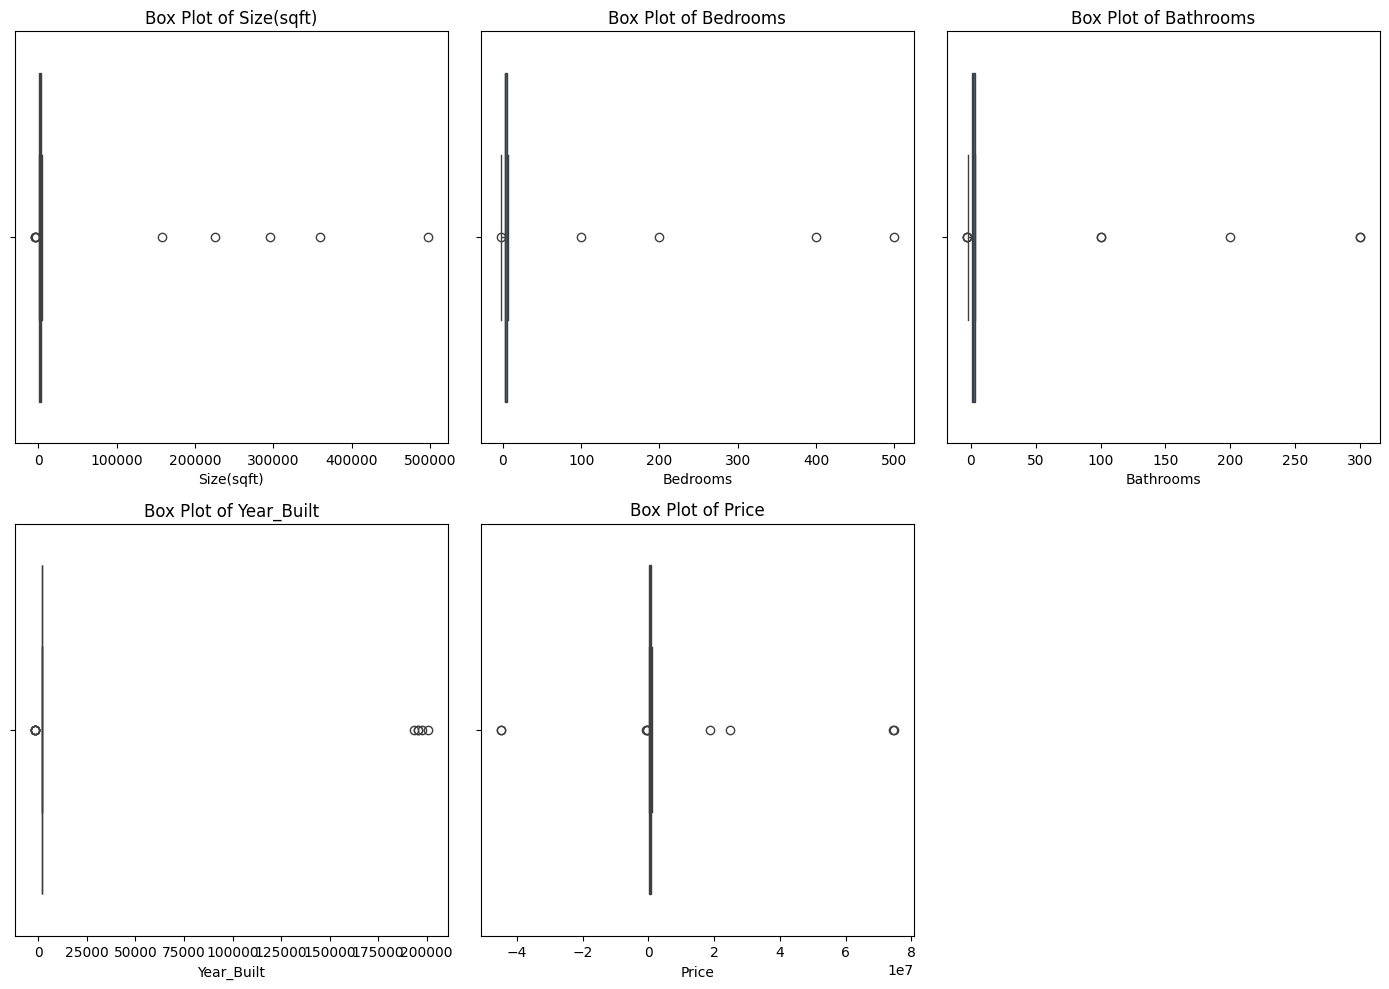

In [ ]:

import matplotlib.pyplot as plt

print("Box Plots to Detect Outliers:")
plt.figure(figsize=(14, 10))

# Box plots for numerical columns
for i, col in enumerate(['Size(sqft)', 'Bedrooms', 'Bathrooms', 'Year_Built', 'Price'], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

Heatmap for Correlation Matrix:


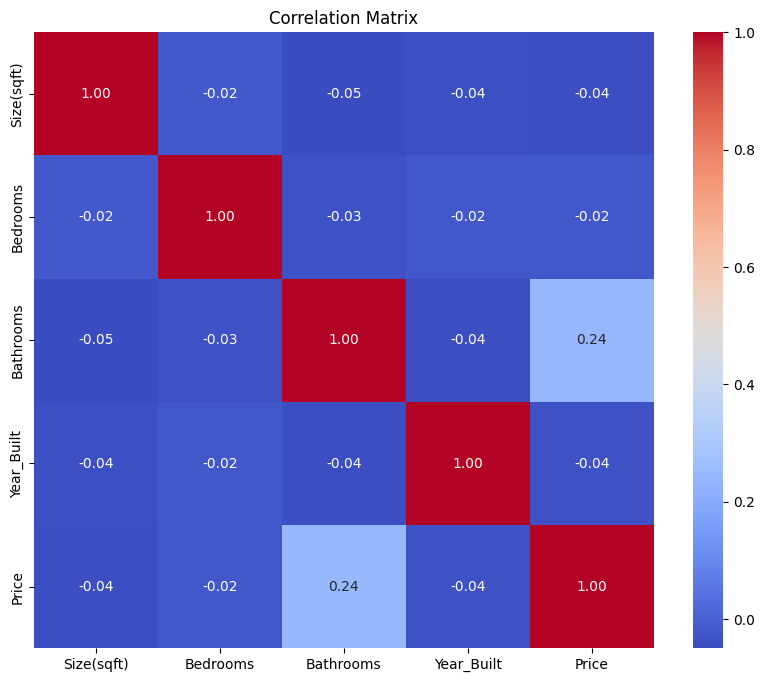

In [ ]:
import matplotlib.pyplot as plt
print("Heatmap for Correlation Matrix:")
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Size(sqft)', 'Bedrooms', 'Bathrooms', 'Year_Built', 'Price']].dropna().corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

  **Box plots to detect Outliers**
  - The figure tries to display potential outliers for every numerical variable, helping us understand the values that deviate significantly from the majority of the data

    **Heatmap for correlation Matrix**
  - This shows us the strong correlation between variables that can help identify irrelevant features.



# Lab 2

**Project 1: Data Cleaning and Preprocessing**

1. Identify and Remove Duplicates:

In [42]:
import pandas as pd

file_path = 'house_prices.csv'
df = pd.read_csv(file_path)

duplicates = df.duplicated().sum()
print(f"Number of duplicates before removal: {duplicates}")

df = df.drop_duplicates()

duplicates_after = df.duplicated().sum()
print(f"Number of duplicates after removal: {duplicates_after}")

Number of duplicates before removal: 0
Number of duplicates after removal: 0


2. Handling Missing Values:

In [43]:
missing_values = df.isnull().sum()
print("Missing values before handling:\n", missing_values)

df['Size(sqft)'].fillna(df['Size(sqft)'].mean(), inplace=True)
df['Price'].fillna(df['Price'].median(), inplace=True)

df['Location'].fillna(df['Location'].mode()[0], inplace=True)
df['House_Type'].fillna('Unknown', inplace=True)

missing_values_after = df.isnull().sum()
print("Missing values after handling:\n", missing_values_after)

Missing values before handling:
 ID             0
Size(sqft)    12
Bedrooms       8
Badhrooms     20
Location      10
House_Type    15
Year_Built    11
Date_Sold     10
Price          5
dtype: int64
Missing values after handling:
 ID             0
Size(sqft)     0
Bedrooms       8
Badhrooms     20
Location       0
House_Type     0
Year_Built    11
Date_Sold     10
Price          0
dtype: int64


3. Outlier Detection and Handling:

In [44]:
from scipy import stats

z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))
outliers = (z_scores > 3).sum(axis=0)
print("Number of outliers:\n", outliers)

df['Size(sqft)'] = df['Size(sqft)'].clip(lower=df['Size(sqft)'].quantile(0.01), upper=df['Size(sqft)'].quantile(0.99))

print(f"Size(sqft) after Winsorization:\n{df['Size(sqft)'].describe()}")

Number of outliers:
 ID            0
Size(sqft)    4
Bedrooms      0
Badhrooms     0
Year_Built    0
Price         2
dtype: int64
Size(sqft) after Winsorization:
count       110.000000
mean      16558.818178
std       59686.711229
min       -4412.990000
25%        1784.250000
50%        3068.000000
75%        4115.500000
max      354095.000000
Name: Size(sqft), dtype: float64


**Project 2: Data Normalization and Standardization**

1. Standardizing Features:

In [45]:
df['Size(sqft)_std'] = (df['Size(sqft)'] - df['Size(sqft)'].mean()) / df['Size(sqft)'].std()
df['Price_std'] = (df['Price'] - df['Price'].mean()) / df['Price'].std()

print("Standardized Size(sqft) column:\n", df['Size(sqft)_std'].describe())
print("Standardized Price column:\n", df['Price_std'].describe())

Standardized Size(sqft) column:
 count    1.100000e+02
mean    -6.913662e-17
std      1.000000e+00
min     -3.513648e-01
25%     -2.475353e-01
50%     -2.260272e-01
75%     -2.084772e-01
max      5.655131e+00
Name: Size(sqft)_std, dtype: float64
Standardized Price column:
 count    1.100000e+02
mean    -1.185920e-17
std      1.000000e+00
min     -3.826930e+00
25%     -8.944908e-02
50%     -7.654606e-02
75%     -5.608601e-02
max      6.066320e+00
Name: Price_std, dtype: float64


2. Mean Normalization:

In [51]:
df['Bedrooms_norm'] = (df['Bedrooms'] - df['Bedrooms'].mean()) / (df['Bedrooms'].max() - df['Bedrooms'].min())
df['Bathrooms_norm'] = (df['Bathrooms'] - df['Bathrooms'].mean()) / (df['Bathrooms'].max() - df['Bathrooms'].min())

print("Mean-normalized Bedrooms column:\n", df['Bedrooms_norm'].describe())
print("Mean-normalized Bathrooms column:\n", df['Bathrooms_norm'].describe())

Mean-normalized Bedrooms column:
 count    1.020000e+02
mean    -1.496624e-18
std      1.310718e-01
min     -3.541496e-02
25%     -2.547460e-02
50%     -2.348653e-02
75%     -1.951039e-02
max      9.645850e-01
Name: Bedrooms_norm, dtype: float64
Mean-normalized Bathrooms column:
 count    9.000000e+01
mean    -6.167906e-19
std      1.662768e-01
min     -5.174184e-02
25%     -3.854052e-02
50%     -3.524019e-02
75%     -3.193986e-02
max      9.482582e-01
Name: Bathrooms_norm, dtype: float64


3. Min-Max Scaling:

In [47]:
df['Year_Built_scaled'] = (df['Year_Built'] - df['Year_Built'].min()) / (df['Year_Built'].max() - df['Year_Built'].min())

print("Min-Max scaled Year Built column:\n", df['Year_Built_scaled'].describe())

Min-Max scaled Year Built column:
 count    99.000000
mean      0.066797
std       0.211703
min       0.000000
25%       0.019278
50%       0.019429
75%       0.019631
max       1.000000
Name: Year_Built_scaled, dtype: float64


**Project 3: Encoding Categorical Variables**

1. Label Encoding:

In [48]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Location_encoded'] = le.fit_transform(df['Location'])

print("Encoded Location column:\n", df['Location_encoded'].head())

Encoded Location column:
 0    0
1    2
2    0
3    2
4    1
Name: Location_encoded, dtype: int64


2. One-Hot Encoding:

In [80]:
df = pd.get_dummies(df, columns=['House_Type'], drop_first=True)

print("Data after one-hot encoding of House_Type:\n", df.head())

Data after one-hot encoding of House_Type:
    ID  Size(sqft)  Bedrooms  Bathrooms  Location  Year_Built  Date_Sold  \
0   1       837.0       1.0        NaN     Rural      1938.0 2020-07-21   
1   2      1378.0       1.0        1.0       NaN         NaN 2022-02-02   
2   3    157600.0       4.0        1.0     Rural      1952.0 2023-06-06   
3   4         NaN       NaN        1.0     Urban      1941.0 2023-06-04   
4   5       879.0       6.0        3.0  Suburban         NaN        NaT   

      Price  House_Type_168148  House_Type_275203  ...  House_Type_517113  \
0  221958.0              False              False  ...              False   
1  771155.0              False              False  ...              False   
2  231932.0              False              False  ...              False   
3  465838.0              False              False  ...              False   
4  359178.0              False              False  ...              False   

   House_Type_627035  House_Type_655839  H

**Project 4: Multivariate Analysis**

1. Correlation Analysis:

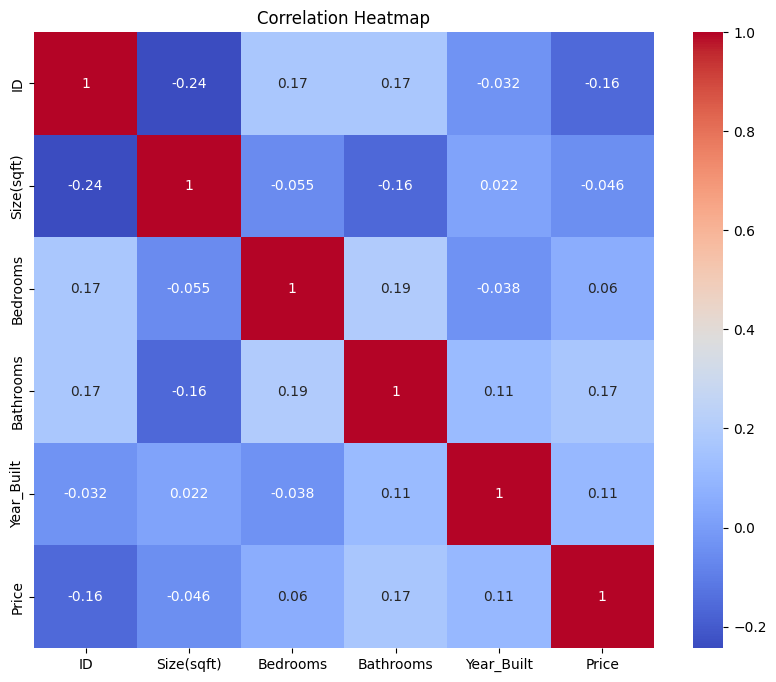

Correlation matrix:
                   ID  Size(sqft)  Bedrooms  Bathrooms  Year_Built     Price
ID          1.000000   -0.243461  0.172088   0.173788   -0.032082 -0.160209
Size(sqft) -0.243461    1.000000 -0.055249  -0.161219    0.022423 -0.046022
Bedrooms    0.172088   -0.055249  1.000000   0.194139   -0.038040  0.060144
Bathrooms   0.173788   -0.161219  0.194139   1.000000    0.113899  0.168624
Year_Built -0.032082    0.022423 -0.038040   0.113899    1.000000  0.105637
Price      -0.160209   -0.046022  0.060144   0.168624    0.105637  1.000000


In [83]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

print("Correlation matrix:\n", corr_matrix)

2. Pairplot Analysis:

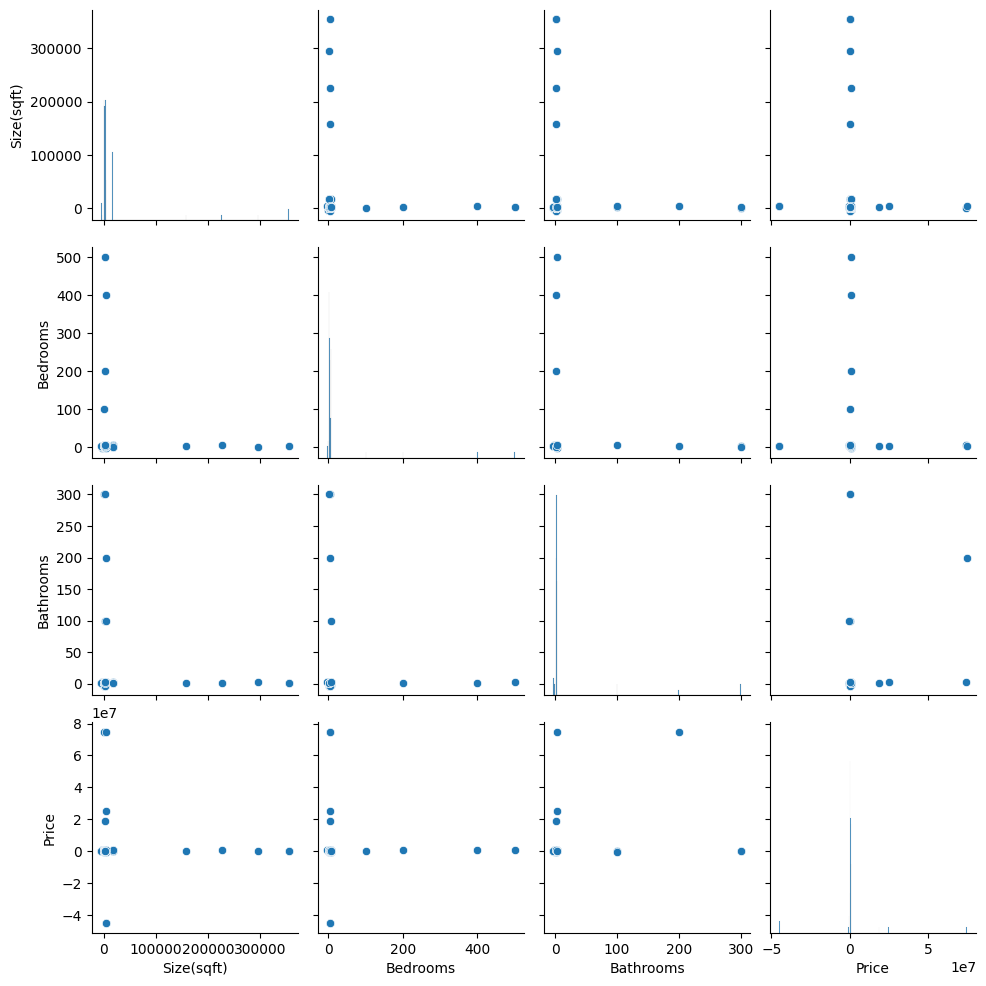

Generated pairplot for 'Size(sqft)', 'Bedrooms', 'Bathrooms', and 'Price'.


In [53]:
sns.pairplot(df[['Size(sqft)', 'Bedrooms', 'Bathrooms', 'Price']])
plt.show()

print("Generated pairplot for 'Size(sqft)', 'Bedrooms', 'Bathrooms', and 'Price'.")